# MLOps Group No: 92 

## Group Members: 
- PEYALA SAMARASIMHA REDDY - 2023AA05072
- PEGALLAPATI SAI MAHARSHI- 2023AA05924 
- ANIRUDDHA DILIP MADURWAR - 2023AA05982 
- K VAMSIKRISHNA - 2023AA05209  


# Assignment 2

# Tasks

## M2: Feature Engineering & Explainability - 10M

### Objective:
Build a feature engineering pipeline with explainability visualizations.

### Tasks:
### 1. Feature Engineering: 
- Implement preprocessing steps such as normalization, scaling, or transformations.

### 2. Explainability:
- Use an open-source explainability library (e.g., SHAP, LIME, or InterpretML) to illustrate how each feature affects the class.
- Use insights from explainability to refine the feature engineering pipeline.

### Deliverables:
- Feature engineering pipeline code.
- Explainability visualizations and analysis.
- Justification of selected features based on explainability results.


# Feature Engineering Code

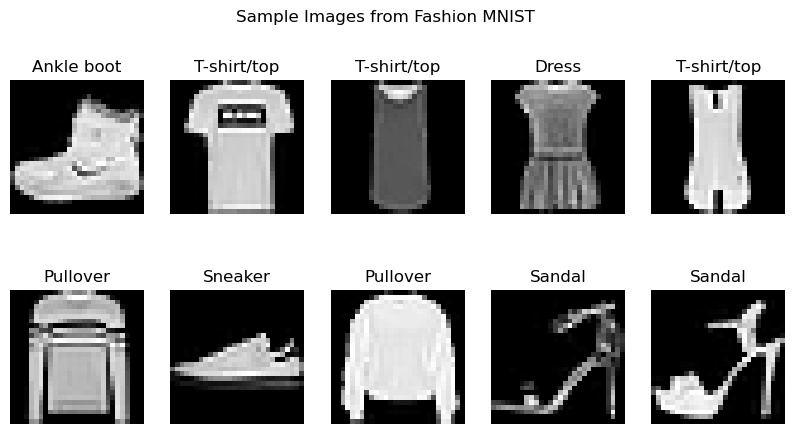


Dataset Shapes:
Training Set: (60000, 28, 28) Labels: (60000,)
Test Set: (10000, 28, 28) Labels: (10000,)

Preprocessing Done: Data Normalized & Scaled


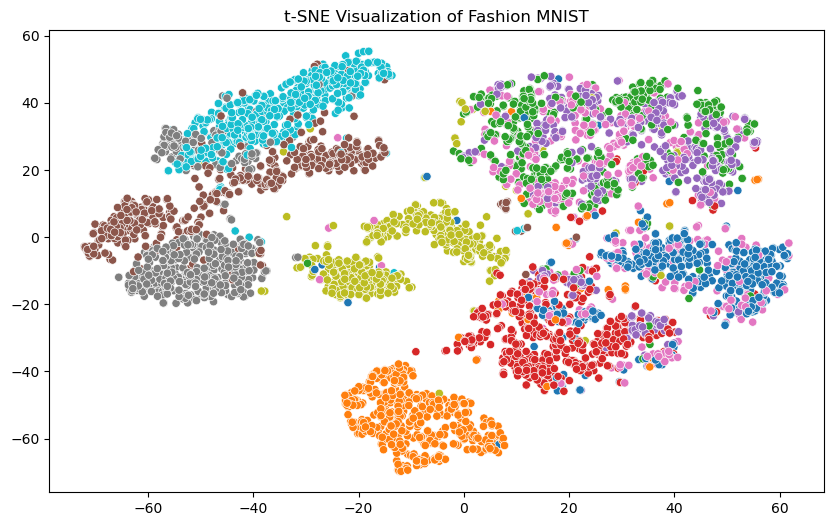

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.ensemble import RandomForestClassifier
import lime.lime_tabular
import shap
import joblib  # To save explanations

# Load Dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Class names for visualization
class_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Visualize Sample Images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_labels[y_train[i]])
    plt.axis('off')
plt.suptitle("Sample Images from Fashion MNIST")
plt.savefig("fashion_mnist_samples.png")  # Save figure
plt.show()

# Print dataset details
print("\nDataset Shapes:")
print("Training Set:", X_train.shape, "Labels:", y_train.shape)
print("Test Set:", X_test.shape, "Labels:", y_test.shape)

# Preprocessing
# Normalize pixel values (0 to 1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten images (28x28 → 784)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Scale features using StandardScaler (mean=0, variance=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

# MinMaxScaler for normalization to the range [0, 1]
min_max_scaler = MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train_flat)
X_test_scaled = min_max_scaler.transform(X_test_flat)

# Apply PowerTransformer (which performs a power transformation to make data more Gaussian)
power_transformer = PowerTransformer()
X_train_scaled = power_transformer.fit_transform(X_train_flat)
X_test_scaled = power_transformer.transform(X_test_flat)

print("\nPreprocessing Done: Data Normalized & Scaled")

# Step 4: t-SNE Visualization
# Reduce dimensionality for visualization purposes using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_train_tsne = tsne.fit_transform(X_train_scaled[:5000])  # Use a subset for faster computation

# Visualize the data points in 2D using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], hue=y_train[:5000], palette="tab10", legend=None)
plt.title("t-SNE Visualization of Fashion MNIST")
#plt.savefig("fashion_mnist_tsne.png")
plt.show()

# Explainibility and Visualizations

## Using LIME

<Figure size 1000x500 with 0 Axes>

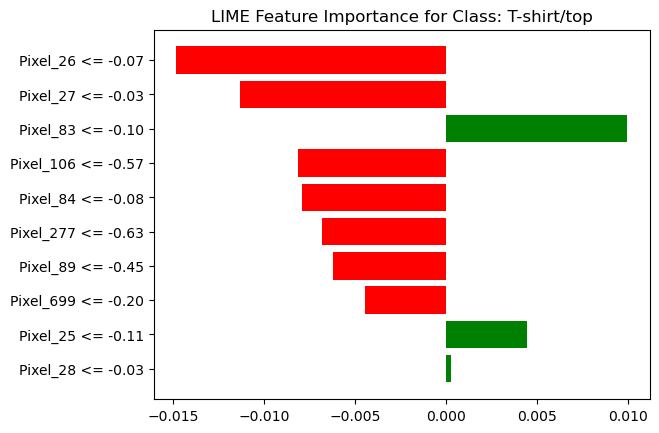

<Figure size 1000x500 with 0 Axes>

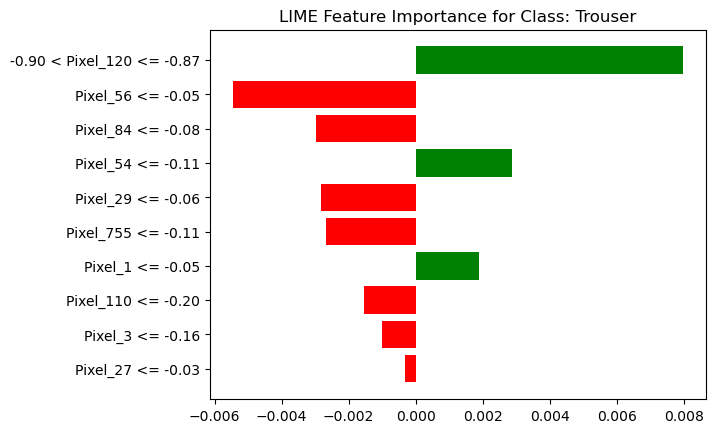

<Figure size 1000x500 with 0 Axes>

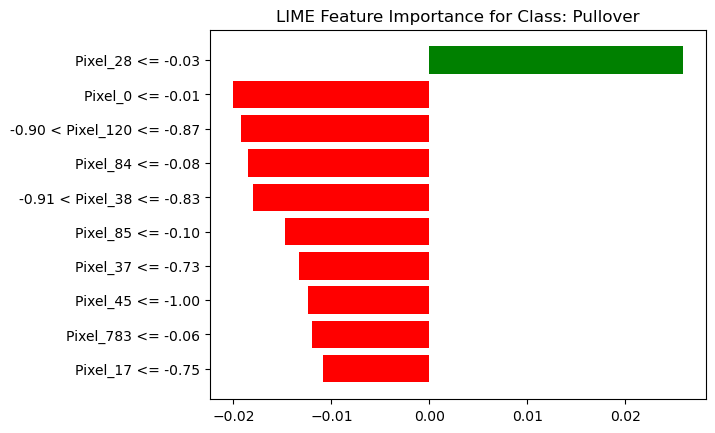

<Figure size 1000x500 with 0 Axes>

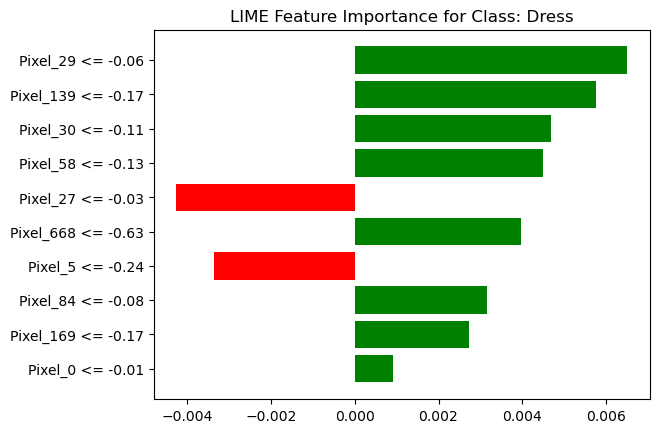

<Figure size 1000x500 with 0 Axes>

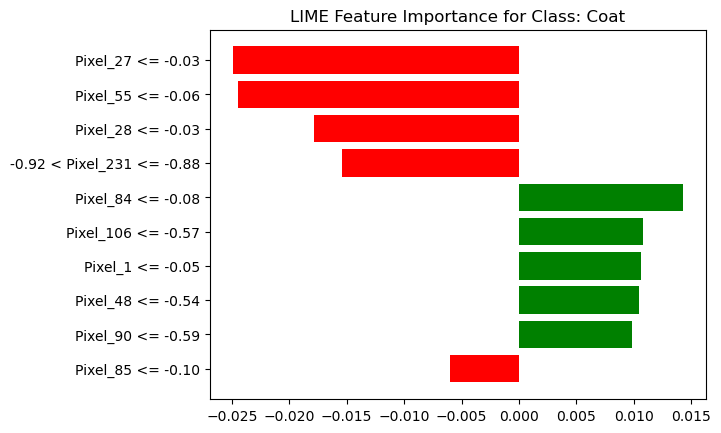

<Figure size 1000x500 with 0 Axes>

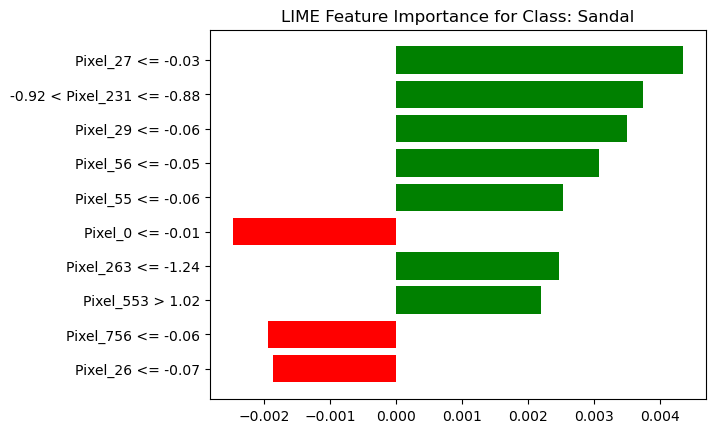

<Figure size 1000x500 with 0 Axes>

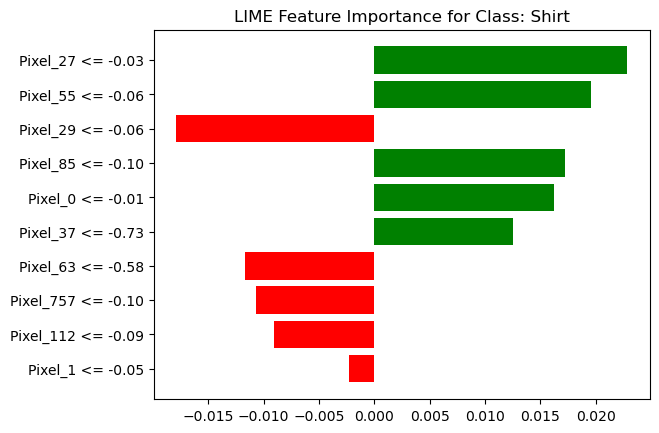

<Figure size 1000x500 with 0 Axes>

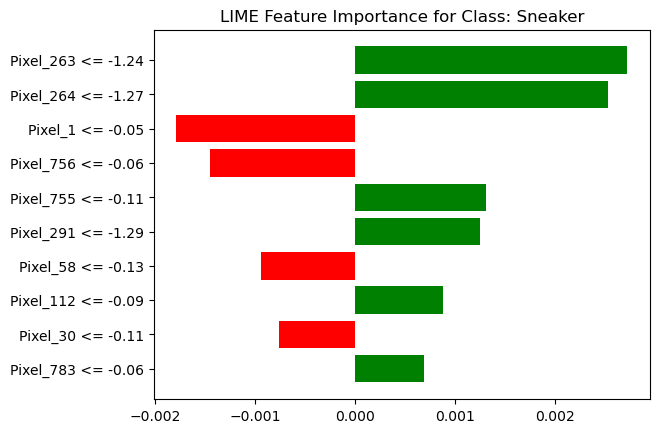

<Figure size 1000x500 with 0 Axes>

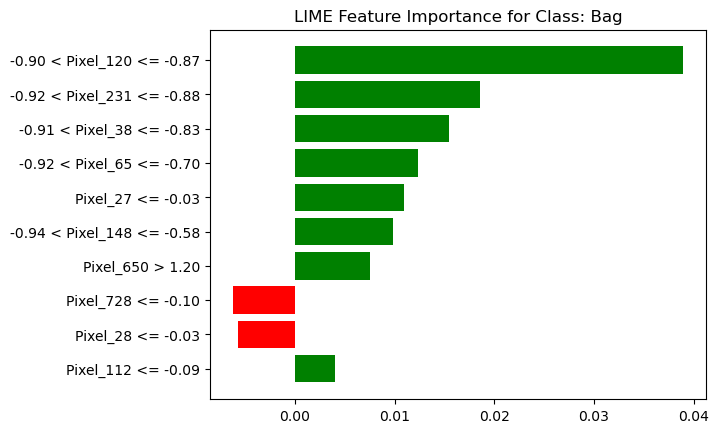

<Figure size 1000x500 with 0 Axes>

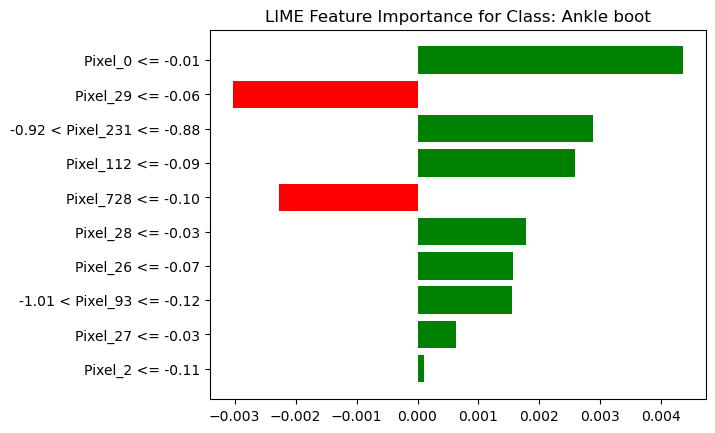


LIME explanation saved as 'lime_explanation_fashion_full.html' and images for each class.


In [3]:
# ----------------------------------------------
# Train Classifier**
# ----------------------------------------------
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Initialize LIME Explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=[f"Pixel_{i}" for i in range(X_train_scaled.shape[1])],
    class_names=class_labels,  # All 10 classes
    mode="classification"
)

# Pick a random test image
sample_index = np.random.randint(0, len(X_test_scaled))
sample_instance = X_test_scaled[sample_index]

# Generate LIME explanation for ALL classes
lime_exp = lime_explainer.explain_instance(
    sample_instance, 
    model.predict_proba, 
    num_features=10,  # Top 10 important features
    top_labels=len(class_labels)  # Get explanation for all 10 classes
)

# Save LIME explanation as an interactive HTML file
lime_exp.save_to_file("lime_explanation_fashion_full.html")

# ----------------------------------------------
# **Plot and Save Feature Importance for Each Class**
# ----------------------------------------------
for class_idx in range(len(class_labels)):  # Loop through all classes
    plt.figure(figsize=(10, 5))
    lime_exp.as_pyplot_figure(label=class_idx)
    plt.title(f"LIME Feature Importance for Class: {class_labels[class_idx]}")
    #plt.savefig(f"lime_explanation_fashion_{class_labels[class_idx]}.png")  # Save each class explanation
    plt.show()

print("\nLIME explanation saved as 'lime_explanation_fashion_full.html' and images for each class.")


## Using SHAP

Training samples: 60000, Test samples: 10000
Image shape: 28 x 28
Original features: 784, Reduced PCA features: 187


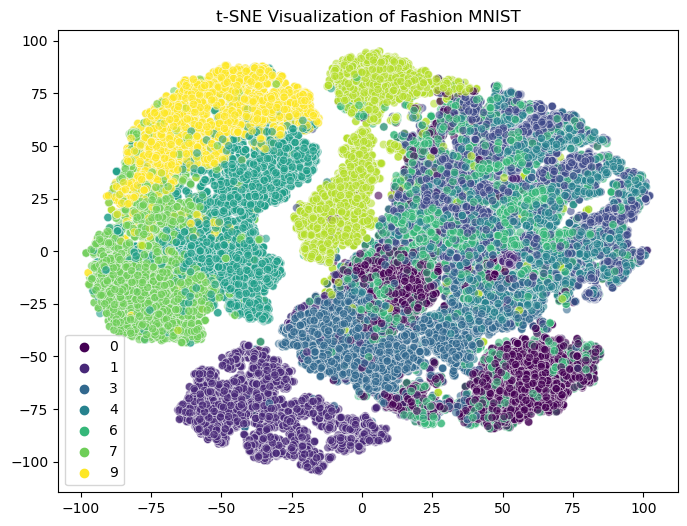

<Figure size 1000x600 with 0 Axes>

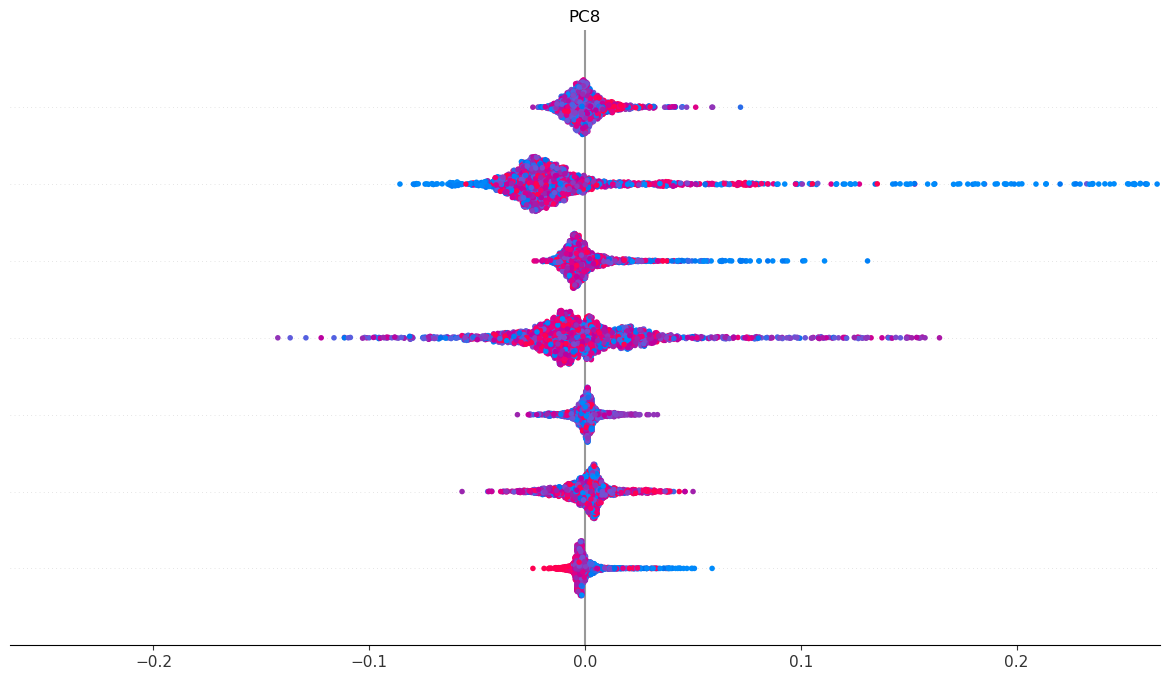

In [6]:
# Import Libraries 
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import shap
import lime
import lime.lime_tabular
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load Fashion MNIST Dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(f"Training samples: {x_train.shape[0]}, Test samples: {x_test.shape[0]}")
print(f"Image shape: {x_train.shape[1]} x {x_train.shape[2]}")

# Data Preprocessing -------------------------------------- #
# Flatten images (28x28 → 784 features)
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Normalize pixel values (0-255 → 0-1)
x_train_scaled = x_train_flat / 255.0
x_test_scaled = x_test_flat / 255.0

# Combine train & test sets
X = np.vstack((x_train_scaled, x_test_scaled))
y = np.hstack((y_train, y_test))

# Train-Test Split (80-20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Dimensionality Reduction (PCA & t-SNE)
# PCA (Keep 95% variance)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

print(f"Original features: {X_train.shape[1]}, Reduced PCA features: {X_train_pca.shape[1]}")

# t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_pca)

# Plot t-SNE results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], hue=y_train, palette="viridis", alpha=0.6)
plt.title("t-SNE Visualization of Fashion MNIST")
plt.show()

# Subset the Data for Faster Training & SHAP Analysis
subset_size = 10000  # Use only 10,000 samples
X_train_pca_sub = X_train_pca[:subset_size]
y_train_sub = y_train[:subset_size]
X_val_pca_sub = X_val_pca[:2000]  # Use only 2,000 validation samples for SHAP

# Train a Simple Model (Random Forest)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_pca_sub, y_train_sub)

# Explainability - SHAP Analysis (Using Subset) -------------------------------------- #
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_val_pca_sub)

# Summary Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_val_pca_sub, feature_names=[f"PC{i}" for i in range(X_val_pca_sub.shape[1])])

# Using Interpret ML

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show
import joblib  # To save explanations

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Class names for visualization
class_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Use only a sample of the dataset for faster processing
X_train_sample = X_train[:1000]  # Use only 1000 training samples
y_train_sample = y_train[:1000]  # Corresponding labels for the 1000 samples
X_test_sample = X_test[:500]    # Use only 500 test samples
y_test_sample = y_test[:500]    # Corresponding labels for the 500 test samples

# Normalize pixel values (0 to 1)
X_train_sample = X_train_sample / 255.0
X_test_sample = X_test_sample / 255.0

# Flatten images (28x28 → 784)
X_train_flat = X_train_sample.reshape(X_train_sample.shape[0], -1)
X_test_flat = X_test_sample.reshape(X_test_sample.shape[0], -1)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

print("\nPreprocessing Done: Data Normalized & Scaled")

# Train an Explainable Boosting Machine (EBM)
ebm = ExplainableBoostingClassifier()
ebm.fit(X_train_scaled, y_train_sample)

# Model Interpretation using InterpretML
# Get feature importance from EBM model
ebm_local = ebm.explain_global(name="Fashion MNIST EBM")

# Show global explanation for the model
show(ebm_local)

# Save the explanation as a visualization file
plt.figure(figsize=(10, 6))
ebm_local.visualize()  # No index argument is needed here
plt.savefig("ebm_feature_importance_sample.png")
plt.show()

print("\nEBM Model Global Feature Importance Visualization Saved as 'ebm_feature_importance_sample.png'.")

# Explain a Single Prediction (Local Explanation)
# Choose a random test sample
sample_index = np.random.randint(0, X_test_scaled.shape[0])
sample_instance = X_test_scaled[sample_index]

# Get the local explanation for the prediction
ebm_local_sample = ebm.explain_local(sample_instance.reshape(1, -1), name="Fashion MNIST EBM Local Explanation")

# Visualize the local explanation
plt.figure(figsize=(10, 6))
ebm_local_sample.visualize()
plt.savefig("local_explanation_sample.png")
plt.show()

print("\nLocal explanation for the sample saved as 'local_explanation_sample.png'.")

# All Steps Completed
print("\nAll steps completed: Dataset Loaded, Preprocessed, Modeled using EBM, and Explained with InterpretML.")


2025-03-23 02:28:22.827442: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-23 02:28:22.836762: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742677102.848367  590118 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742677102.852050  590118 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742677102.861373  590118 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 


Preprocessing Done: Data Normalized & Scaled


/home/samara/anaconda3/envs/m1/lib/python3.10/site-packages/interpret/glassbox/_ebm/_ebm.py:1165: UserWarning: Detected multiclass problem. Forcing interactions to 0. Multiclass interactions only have local explanations. They are not currently displayed in the global explanation visualizations. Set interactions=0 to disable this warning. If you still want multiclass interactions, this API accepts a list, and the measure_interactions function can be used to detect them.
  warn(


<!-- http://127.0.0.1:7059/139952916919728/ -->

<Figure size 1000x600 with 0 Axes>


EBM Model Global Feature Importance Visualization Saved as 'ebm_feature_importance_sample.png'.


<Figure size 1000x600 with 0 Axes>


Local explanation for the sample saved as 'local_explanation_sample.png'.

All steps completed: Dataset Loaded, Preprocessed, Modeled using EBM, and Explained with InterpretML.


## Refined Feature Engineering based on Explainable AI Visualisations

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from interpret.glassbox import ExplainableBoostingClassifier
import shap
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Load Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Flatten images to 1D (28x28 = 784)
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0  # Normalize
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0      # Normalize

# Apply PCA for Dimensionality Reduction (Keeping 100 components)
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train Explainable Boosting Machine (EBM) for Feature Importance
ebm = ExplainableBoostingClassifier()
ebm.fit(X_train_pca, y_train)

# Extract feature importances from EBM
ebm_importances = ebm.feature_importances_

# Select top 50 most important PCA components
top_features_idx = np.argsort(ebm_importances)[-50:]
X_train_selected = X_train_pca[:, top_features_idx]
X_test_selected = X_test_pca[:, top_features_idx]

# Train Random Forest & Use SHAP to Identify Most Influential Features
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_selected, y_train)

# SHAP Explanation
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train_selected[:100])  # Using 100 samples for efficiency

# Aggregate SHAP values across all classes
shap_importance = np.abs(np.array(shap_values)).mean(axis=(0, 1))

# Select top 30 most important PCA features from SHAP analysis
top_shap_features_idx = np.argsort(shap_importance)[-30:]
X_train_final = X_train_selected[:, top_shap_features_idx]
X_test_final = X_test_selected[:, top_shap_features_idx]

print(f"Final selected feature space: {X_train_final.shape}")  


Final selected feature space: (6000, 30)
